# A mass radius relation for planets compiled from theory
By Jared Males


<img src="img/Jareds-planet-mass-radius-daig.png"  width="900">

# This code reproduces the fit line from: https://jaredmales.github.io/mxlib-doc/group__planets.html#ga4b350ecfdeaca1bedb897db770b09789

<img src="img/Jareds-old-planet_mrdiag_2017.06.19.png"  width="700">

<IPython.core.display.Javascript object>


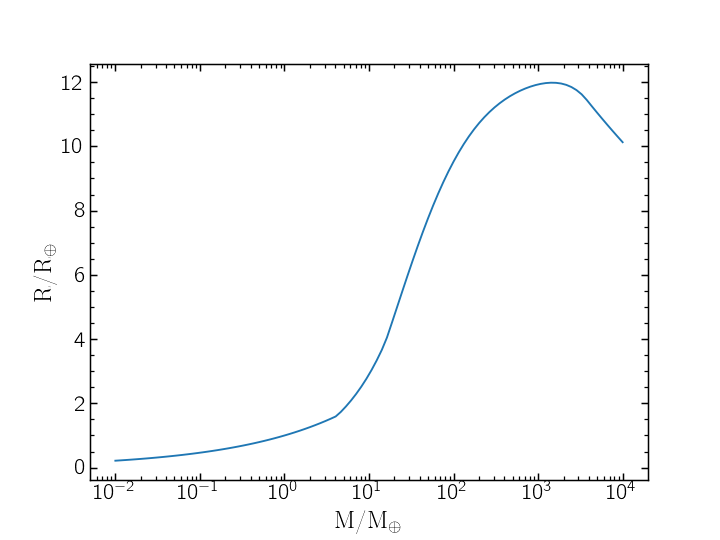

Text(0, 0.5, 'R/R$_{\\oplus}$')

In [16]:
def PlanetMass2Radius(M):
    try:
        M = M.to(u.Mearth)
        M = M.value
    except:
        pass
    
    if M < 4.1:
        R = M**(1/3)
        
    if M >= 4.1 and M < 15.84:
        R = 0.62 * M**(0.67)
        
    if M >= 15.84 and M < 3591.1:
        coeff = [14.0211, -44.8414, 53.6554, -25.3289, 5.4920, -0.4586]
        power = [0, 1, 2, 3, 4, 5]
        R = 0
        for i in range(6):
            R += coeff[i] * (np.log10(M)**power[i])
            
    if M >= 3591.1:
        R = 32.03 * M**(-1/8)
        
    return R

Ms = np.logspace(-2,4,100)
Rs = np.array([mass2radius(Ms[i]*u.Mearth) for i in range(len(Ms))])

%matplotlib notebook
plt.plot(Ms,Rs)
plt.gca().set_xscale('log')
plt.xlabel(r'M/M$_{\oplus}$')
plt.ylabel(r'R/R$_{\oplus}$')